# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (12,5)
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, explained_variance_score, max_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# LOAD DATA

In [2]:
# Import the CSV file
df = pd.read_csv("/content/busan_dataset.csv")

In [3]:
df.head()

,Date,SunZenith_KMU,DHI_Average,GHI_Average,DNI_Average,Ambient_Pressure,Un,Uo,Water,Un (atm-cm),...,wv_500,wv_625,CI_Beyer,CI_Perez,CI_Hammer,CI_ESRA,GHI_FARMS /10,GHI_FARMS,Dif,New_CC
0,1/25/18 12:00,55.256931,0,569.444444,0,1020.8,0.376078,320.720975,0.295652,0.000376078,...,0.4999,0.6742,0.191929,0.069673,0.202354,0.179687,496.464006,NaN,72.980438,0.0
1,1/25/18 13:00,54.331137,0,655.555556,0,1019.9,0.376021,320.736450,0.294089,0.000376021,...,0.4999,0.6742,0.208443,0.087683,0.205240,0.198831,498.765527,NaN,156.790029,0.0
2,1/25/18 14:00,57.057826,0,636.111111,0,1019.0,0.375963,320.751925,0.292527,B,...,0.4999,0.6742,0.195137,0.060272,0.197160,0.205699,454.981615,NaN,181.129496,0.0
3,1/25/18 15:00,62.957383,0,622.222222,0,1018.5,0.375906,320.767400,0.290965,0.000375906,...,0.4999,0.6742,0.222392,0.069143,0.596989,0.577235,197.006239,NaN,425.215983,0.0
4,1/25/18 16:00,71.230862,0,413.888889,0,1018.8,0.375849,320.782875,0.289402,0.000375849,...,0.4999,0.6742,0.336698,0.139356,0.347180,0.365768,191.833318,NaN,222.055571,0.0


In [4]:
# remove spaces on the column
df.columns = df.columns.str.lstrip()
df.columns = df.columns.str.rstrip()

In [5]:
# Parse the "Date" column
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Data Exploration

In [6]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6647 entries, 2018-01-25 12:00:00 to 2019-12-31 15:00:00
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SunZenith_KMU     6647 non-null   float64
 1   DHI_Average       6647 non-null   int64  
 2   GHI_Average       6647 non-null   float64
 3   DNI_Average       6647 non-null   int64  
 4   Ambient_Pressure  6647 non-null   float64
 5   Un                6647 non-null   float64
 6   Uo                6647 non-null   float64
 7   Water             6647 non-null   float64
 8   Un (atm-cm)       6647 non-null   object 
 9   Uo (atm-cm)       6647 non-null   float64
 10  AOD               6647 non-null   float64
 11  Alpha             6647 non-null   float64
 12  OT                6647 non-null   float64
 13  wv_500            6647 non-null   float64
 14  wv_625            6647 non-null   float64
 15  CI_Beyer          6647 non-null   float64
 16  CI_Per

In [7]:
df.head()

,SunZenith_KMU,DHI_Average,GHI_Average,DNI_Average,Ambient_Pressure,Un,Uo,Water,Un (atm-cm),Uo (atm-cm),...,wv_500,wv_625,CI_Beyer,CI_Perez,CI_Hammer,CI_ESRA,GHI_FARMS /10,GHI_FARMS,Dif,New_CC
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-25 12:00:00,55.256931,0,569.444444,0,1020.8,0.376078,320.720975,0.295652,0.000376078,0.320721,...,0.4999,0.6742,0.191929,0.069673,0.202354,0.179687,496.464006,NaN,72.980438,0.0
2018-01-25 13:00:00,54.331137,0,655.555556,0,1019.9,0.376021,320.736450,0.294089,0.000376021,0.320736,...,0.4999,0.6742,0.208443,0.087683,0.205240,0.198831,498.765527,NaN,156.790029,0.0
2018-01-25 14:00:00,57.057826,0,636.111111,0,1019.0,0.375963,320.751925,0.292527,B,0.320752,...,0.4999,0.6742,0.195137,0.060272,0.197160,0.205699,454.981615,NaN,181.129496,0.0
2018-01-25 15:00:00,62.957383,0,622.222222,0,1018.5,0.375906,320.767400,0.290965,0.000375906,0.320767,...,0.4999,0.6742,0.222392,0.069143,0.596989,0.577235,197.006239,NaN,425.215983,0.0
2018-01-25 16:00:00,71.230862,0,413.888889,0,1018.8,0.375849,320.782875,0.289402,0.000375849,0.320783,...,0.4999,0.6742,0.336698,0.139356,0.347180,0.365768,191.833318,NaN,222.055571,0.0


In [8]:
df.describe()

,SunZenith_KMU,DHI_Average,GHI_Average,DNI_Average,Ambient_Pressure,Un,Uo,Water,Uo (atm-cm),AOD,...,wv_500,wv_625,CI_Beyer,CI_Perez,CI_Hammer,CI_ESRA,GHI_FARMS /10,GHI_FARMS,Dif,New_CC
count,6647.000000,6647.0,6647.000000,6647.0,6647.000000,6647.000000,6647.000000,6647.000000,6647.000000,6647.000000,...,6.647000e+03,6.647000e+03,6647.000000,6647.000000,6647.000000,3208.000000,3208.000000,0.0,3208.000000,3208.000000
mean,51.060330,0.0,422.731642,0.0,1006.121995,0.376902,314.181003,2.153924,0.314181,0.332027,...,4.999000e-01,6.742000e-01,0.328786,0.164718,0.389885,0.351641,378.534722,NaN,103.209254,0.509476
std,18.092119,0.0,276.593287,0.0,7.807684,0.160003,20.866419,1.505452,0.020866,0.322169,...,1.665460e-16,1.110307e-16,0.257296,0.252024,0.312105,0.289786,278.452959,NaN,89.918147,0.406216
min,12.998309,0.0,0.000000,0.0,979.200000,0.213722,280.086209,0.081012,0.280086,0.008354,...,4.999000e-01,6.742000e-01,0.014978,-0.171222,-0.004381,-0.024888,0.006802,NaN,0.105018,0.000000
25%,36.855424,0.0,175.000000,0.0,1000.300000,0.265414,293.672849,0.828799,0.293673,0.133729,...,4.999000e-01,6.742000e-01,0.125161,-0.036668,0.142355,0.114581,135.360061,NaN,33.969374,0.000000
50%,52.988619,0.0,400.000000,0.0,1005.500000,0.333155,317.962151,1.769083,0.317962,0.245290,...,4.999000e-01,6.742000e-01,0.239890,0.082875,0.277230,0.263806,328.336472,NaN,78.043422,0.600000
75%,64.881856,0.0,638.888889,0.0,1011.200000,0.458593,334.272711,3.388043,0.334273,0.390532,...,4.999000e-01,6.742000e-01,0.509362,0.345438,0.612981,0.561245,591.146724,NaN,151.186828,0.900000
max,84.992310,0.0,1088.888889,0.0,1034.500000,1.128154,342.529169,5.658164,0.342529,3.674310,...,4.999000e-01,6.742000e-01,2.530834,1.524264,2.617011,2.246217,1060.470970,NaN,494.122077,1.000000


# Data Cleaning

In [9]:
df.isna().sum()

,0
SunZenith_KMU,0
DHI_Average,0
GHI_Average,0
DNI_Average,0
Ambient_Pressure,0
Un,0
Uo,0
Water,0
Un (atm-cm),0
Uo (atm-cm),0


In [ ]:
# fill the nan values by upper row value
#df = df.fillna(method='ffill')
#df.tail()

# Data Engineering

In [ ]:
# Extracting features from the index before filtering the DataFrame
#df['hour'] = df.index.hour
#df['day_of_month'] = df.index.day
#df['day_of_week'] = df.index.dayofweek
#df['month'] = df.index.mont

In [10]:
# Now filter the DataFrame to include only the required columns and the new features
required_cols = ['GHI_Average', 'SunZenith_KMU', 'Ambient_Pressure', 'Water', 'AOD', 'wv_500', 'CI_Beyer']
df = df[required_cols]

# Display the first few rows to confirm the columns are present
print(df.head())

                     GHI_Average  SunZenith_KMU  Ambient_Pressure     Water  \
Date                                                                          
2018-01-25 12:00:00   569.444444      55.256931            1020.8  0.295652   
2018-01-25 13:00:00   655.555556      54.331137            1019.9  0.294089   
2018-01-25 14:00:00   636.111111      57.057826            1019.0  0.292527   
2018-01-25 15:00:00   622.222222      62.957383            1018.5  0.290965   
2018-01-25 16:00:00   413.888889      71.230862            1018.8  0.289402   

                          AOD  wv_500  CI_Beyer  
Date                                             
2018-01-25 12:00:00  0.092994  0.4999  0.191929  
2018-01-25 13:00:00  0.093331  0.4999  0.208443  
2018-01-25 14:00:00  0.093668  0.4999  0.195137  
2018-01-25 15:00:00  0.094004  0.4999  0.222392  
2018-01-25 16:00:00  0.094341  0.4999  0.336698  


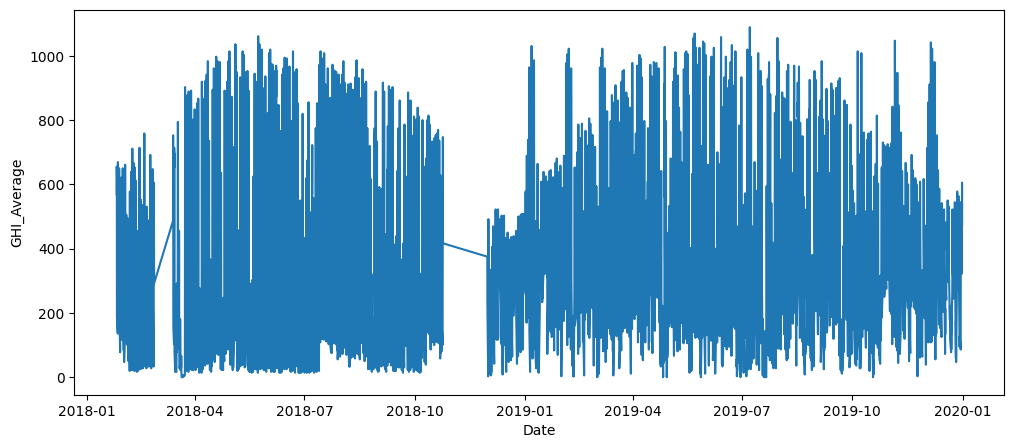

In [11]:
sns.lineplot(x=df.index, y='GHI_Average', data=df)
plt.show()

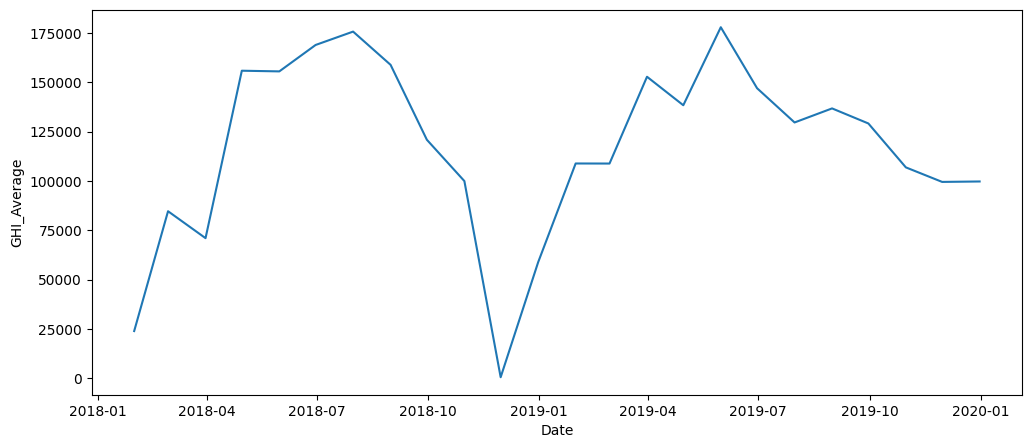

In [12]:
df_by_month = df.resample('M').sum()
sns.lineplot(x=df_by_month.index, y='GHI_Average', data=df_by_month)
plt.show()

In [ ]:
# Check the list of column names in the DataFrame
#print(df.columns)

In [ ]:
# Create a figure with 4 subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(18, 6))

# Ensure that axs is a flat array, in case it isn't already
if isinstance(axs, np.ndarray):
    axs = axs.flatten()

# Plot 1: Hourly GHI Average
sns.pointplot(x='hour', y='GHI_Average', data=df, ax=axs[0])
axs[0].set_title('Hourly GHI Average')

# Plot 2: GHI Average by Day of the Week
sns.pointplot(x='day_of_week', y='GHI_Average', data=df, ax=axs[1])
axs[1].set_title('GHI Average by Day of the Week')

# Plot 3: GHI Average by Day of the Month
sns.pointplot(x='day_of_month', y='GHI_Average', data=df, ax=axs[2])
axs[2].set_title('GHI Average by Day of the Month')

# Plot 4: GHI Average by Month
sns.pointplot(x='month', y='GHI_Average', data=df, ax=axs[3])
axs[3].set_title('GHI Average by Month')

# Show the plots
plt.tight_layout()
plt.show()

# Data Preprocessing

In [13]:
# Train & Test Datasest split
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print('Train size:',len(train))
print('Test size:', len(test))

Train size: 5982
Test size: 665


In [14]:
# Input Scaling
cols = ['SunZenith_KMU','Ambient_Pressure','Water','AOD','wv_500','CI_Beyer']

scaler = RobustScaler()
scaler = scaler.fit(np.asarray(train[cols]))

train.loc[:, cols] = scaler.transform(np.asarray(train[cols]))
test.loc[:, cols] = scaler.transform(np.asarray(test[cols]))

In [15]:
# scaling GHI
GHI_scaler = RobustScaler()
GHI_scaler = GHI_scaler.fit(train[['GHI_Average']])
train['GHI_Average'] = GHI_scaler.transform(train[['GHI_Average']])
test['GHI_Average'] = GHI_scaler.transform(test[['GHI_Average']])


In [16]:
print('Train shape:',train.shape)
print('Test shape:', test.shape)


Train shape: (5982, 7)
Test shape: (665, 7)


# Model Building

In [17]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [18]:
time_steps = 10
# reshape to [samples, time_steps, features]
X_train, y_train = create_dataset(train, train.GHI_Average, time_steps)
X_test, y_test = create_dataset(test, test.GHI_Average, time_steps)
print(X_train.shape, y_train.shape)

(5972, 10, 7) (5972,)


# **RNN**

In [19]:
# RNN model building
rnn_model = tf.keras.Sequential()
rnn_model.add(tf.keras.layers.SimpleRNN(units=128, activation='relu', input_shape=(time_steps, X_train.shape[2])))
rnn_model.add(tf.keras.layers.Dropout(rate=0.2))
rnn_model.add(tf.keras.layers.Dense(units=1))

# Compile the model
rnn_model.compile(loss='mse', optimizer='adam')

In [20]:
# Train the model
rnn_history = rnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, shuffle=False)

Epoch 1/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1746 - val_loss: 0.0471
Epoch 2/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0724 - val_loss: 0.0442
Epoch 3/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0555 - val_loss: 0.0427
Epoch 4/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0479 - val_loss: 0.0419
Epoch 5/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0465 - val_loss: 0.0429
Epoch 6/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0425 - val_loss: 0.0427
Epoch 7/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0419 - val_loss: 0.0435
Epoch 8/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0403 - val_loss: 0.0430
Epoch 9/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0390 - val_loss: 0.0432
Epoch 10/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0372 - val_loss: 0.0428
Epoch 11/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0362 - val_loss: 0.0442
Epoch 12/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

In [21]:
# Model summary
rnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 128)                 │          17,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,613 (205.52 KB)

 Trainable params: 17,537 (68.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 35,076 (137.02 KB)

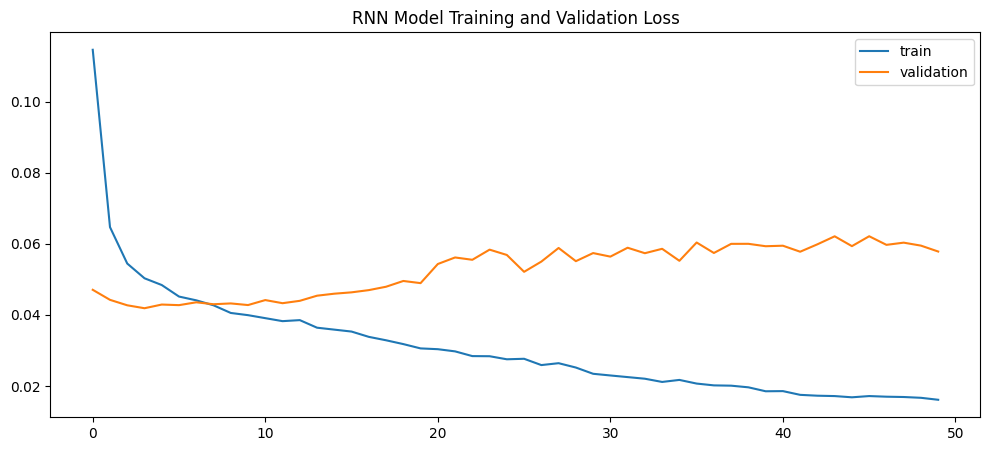

In [22]:
# model validation
plt.plot(rnn_history.history['loss'], label='train')
plt.plot(rnn_history.history['val_loss'], label='validation')
plt.title('RNN Model Training and Validation Loss')
plt.legend()
plt.show()

In [23]:
# inverse scaling

y_pred = rnn_model.predict(X_test)
y_train_inv = GHI_scaler.inverse_transform(y_train.reshape(1, -1))
y_test_inv = GHI_scaler.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = GHI_scaler.inverse_transform(y_pred)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


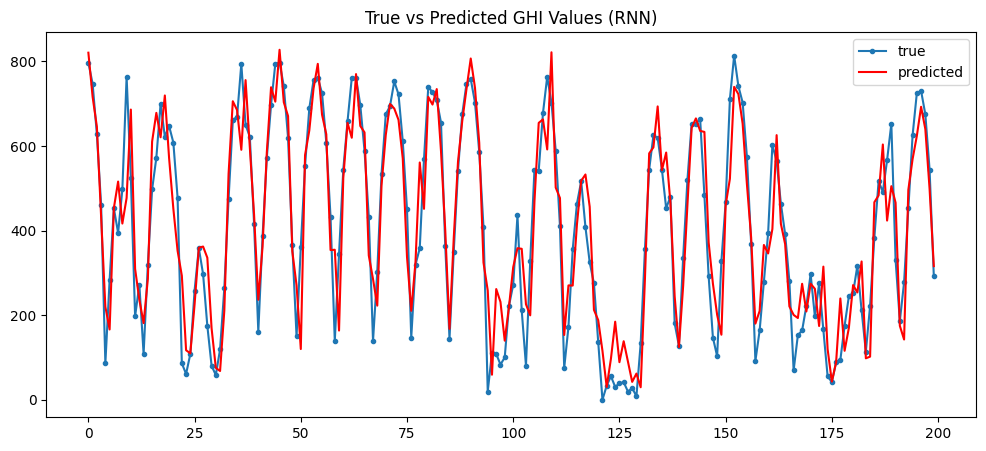

In [24]:
# visualize prediction
plt.plot(y_test_inv.flatten()[:200], marker='.', label='true')
plt.plot(y_pred_inv.flatten()[:200], 'r', label='predicted')
# Add title
plt.title('True vs Predicted GHI Values (RNN)')
plt.legend()
plt.show()

In [25]:
#evaluation metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [26]:
# Compute Metrics
r2 = r2_score(y_test_inv.flatten(), y_pred_inv.flatten())
print('R^2:', r2)

diff = y_test_inv.flatten() - y_pred_inv.flatten()

mae = mean_absolute_error(y_test_inv.flatten(), y_pred_inv.flatten())
print('MAE:', mae)

mse = mean_squared_error(y_test_inv.flatten(), y_pred_inv.flatten())
print('MSE:', mse)

rmse = np.sqrt(mean_squared_error(y_test_inv.flatten(), y_pred_inv.flatten()))
print('RMSE: %.3f' % rmse)

mbe = np.mean(diff)
print('MBE:', mbe)

rrmse = np.sqrt(mean_squared_error(y_test_inv.flatten(), y_pred_inv.flatten())) / np.mean(y_test_inv.flatten())
print('RRMSE:', rrmse)

rmbe = mbe / np.mean(y_test_inv.flatten())
print('RMBE:', rmbe)

R^2: 0.7759115214125528
MAE: 71.59849609107133
MSE: 8651.11487572709
RMSE: 93.011
MBE: -25.500950534609057
RRMSE: 0.23328774693721033
RMBE: -0.06396056009351299


In [27]:
# Create dictionary and DataFrame
metrics = {
    'Metric': ['R^2', 'MAE', 'MSE', 'RMSE', 'MBE', 'RRMSE', 'RMBE'],
    'Value': [r2, mae, mse, rmse, mbe, rrmse, rmbe]
}
df_metrics_RNN = pd.DataFrame(metrics)

# Display the DataFrame
df_metrics_RNN.head()

,Metric,Value
0,R^2,0.775912
1,MAE,71.598496
2,MSE,8651.114876
3,RMSE,93.011370
4,MBE,-25.500951


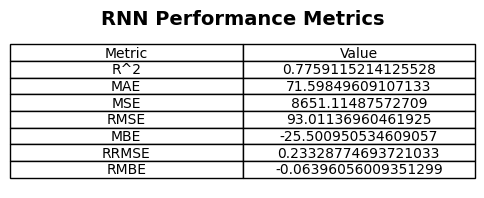

In [28]:
# Plot the table
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('tight')
ax.axis('off')

# Add title
title = 'RNN Performance Metrics'
ax.text(0.5, 1.1, title, ha='center', va='center', fontsize=14, weight='bold', transform=ax.transAxes)

# Create and display the table
table = ax.table(cellText=df_metrics_RNN.values, colLabels=df_metrics_RNN.columns, cellLoc='center', loc='center')

# Display the plot
plt.show()

In [29]:
# Assuming 'df' has a DateTime index and you want to keep the corresponding dates for the test set
dates = df.index[train_size + time_steps:].to_list()

# Combine the predicted and actual values with the dates
results_RNN_df = pd.DataFrame({
    'Time': dates,
    'Actual GHI': y_test_inv.flatten(),
    'Predicted GHI': y_pred_inv.flatten()
})

# Display the first few rows
results_RNN_df.head()

,Time,Actual GHI,Predicted GHI
0,2019-04-10 13:00:00,797.222222,820.690308
1,2019-04-10 14:00:00,747.222222,716.320496
2,2019-04-10 15:00:00,627.777778,645.732544
3,2019-04-10 16:00:00,461.111111,434.962341
4,2019-05-10 08:00:00,86.111111,219.828491


In [30]:
# Save the table to a CSV file
results_RNN_df.to_csv('RNN02_GHI_predictions.csv', index=False)